In [1]:
#Useful imports
import sys
sys.path.append("../")

#Importing Metropolis-Hastings algorithms
from pyACC.Sampler import metropolis_hastings
from pyACC.Sampler import general_metropolis_hastings

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("MCMC - Metropolis-Hastings algorithm")

In [2]:
# Define the target distribution (standard Gaussiann, i.e. with mean 0 and standard deviation 1)
def target_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

In [3]:
# Proposal distribution: Gaussian with mean=current_state, std_dev=1
def gaussian_proposal(current_state, proposed_sd):
    return np.random.normal(current_state, proposed_sd)  

# Define parameters
initial_state = 0.1 # Initial state
num_samples = 800000  # Number of samples to generate
proposed_sd = 1.3

# Generate samples using Metropolis-Hastings algorithm
samples, efficiency_counter = metropolis_hastings(target_distribution, initial_state, num_samples, gaussian_proposal, proposed_sd)

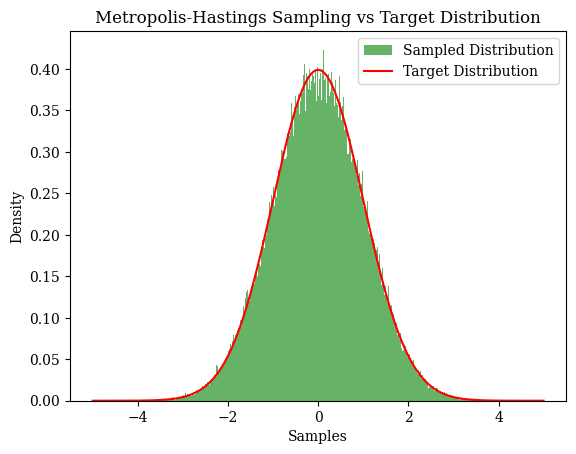

In [4]:
# Plot histogram of samples
plt.hist(samples, bins=700, density=True, alpha=0.6, color='g', label='Sampled Distribution')

# Plot target distribution curve
x_values = np.linspace(-5, 5, 1000)
target_values = target_distribution(x_values)
plt.plot(x_values, target_values, color='r', label='Target Distribution')

# Add title and labels
plt.title('Metropolis-Hastings Sampling vs Target Distribution')
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

In [5]:
#Efficiency check
print('Number of wanted samples: ', num_samples)
print('Number of point generated: ', efficiency_counter)
print('Efficiency (%): ', num_samples/efficiency_counter*100)

2024-04-02 15:24:51.598855 :: MCMC - Metropolis-Hastings algorithm  :: Number of wanted samples:  800000
2024-04-02 15:24:51.599344 :: MCMC - Metropolis-Hastings algorithm  :: Number of point generated:  800000
2024-04-02 15:24:51.599459 :: MCMC - Metropolis-Hastings algorithm  :: Efficiency (%):  100.0


**GENERAL MCMC ALGORITH**

In [6]:
# Example general target distribution function
def target_distribution(x, *args, **kwargs):
    # Example: Gaussian distribution with unknown mean and standard deviation
    mu = kwargs.get('mu', 0)  # Default mean is 0 if not provided
    sigma = kwargs.get('sigma', 1)  # Default standard deviation is 1 if not provided
    return np.exp(-0.5 * ((x - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))


In [7]:
# Example general proposal distribution function
def gaussian_proposal(current_state, proposal_sd, *args, **kwargs):
    return np.random.normal(current_state, proposal_sd)

In [8]:
# Define parameters
initial_state = 0
num_samples = 90000
proposal_sd = 1

In [9]:
# Generate samples using general Metropolis-Hastings algorithm
samples, efficiency_counter = general_metropolis_hastings(target_distribution, gaussian_proposal, initial_state, num_samples, proposal_sd, mu=0, sigma=1)

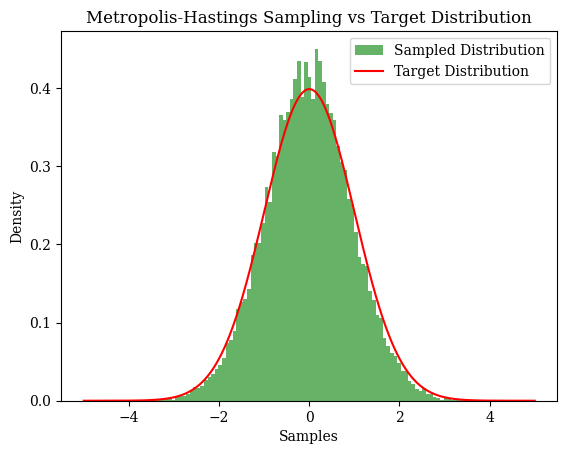

In [10]:
# Plot histogram of samples
plt.hist(samples, bins=100, density=True, alpha=0.6, color='g', label='Sampled Distribution')

# Plot target distribution curve
x_values = np.linspace(-5, 5, 1000)
target_values = target_distribution(x_values, mu=0, sigma=1)
plt.plot(x_values, target_values, color='r', label='Target Distribution')

# Add title and labels
plt.title('Metropolis-Hastings Sampling vs Target Distribution')
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

In [11]:
#Efficiency check
print('Number of wanted samples: ', num_samples)
print('Number of point generated: ', efficiency_counter)
print('Efficiency (%): ', num_samples/efficiency_counter*100)

2024-04-02 15:25:01.233581 :: MCMC - Metropolis-Hastings algorithm  :: Number of wanted samples:  90000
2024-04-02 15:25:01.234068 :: MCMC - Metropolis-Hastings algorithm  :: Number of point generated:  90000
2024-04-02 15:25:01.234521 :: MCMC - Metropolis-Hastings algorithm  :: Efficiency (%):  100.0
